## Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.


In this homework, we will use the lead scoring dataset Bank Marketing dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv).


In this dataset our desired target for classification task will be `converted` variable - has the client signed up to the platform or not.

In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv

--2025-10-19 15:28:14--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80876 (79K) [text/plain]
Saving to: 'course_lead_scoring.csv'

     0K .......... .......... .......... .......... .......... 63% 3,06M 0s
    50K .......... .......... ........                        100% 3,59M=0,02s

2025-10-19 15:28:15 (3,24 MB/s) - 'course_lead_scoring.csv' saved [80876/80876]



### Data preparation

* Check if the missing values are presented in the features.
* If there are missing values:
    * For caterogiral features, replace them with 'NA'
    * For numerical features, replace with with 0.0 


Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` function for that with `random_state=1`

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('course_lead_scoring.csv')

In [4]:
df.shape

(1462, 9)

In [5]:
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1334 non-null   object 
 1   industry                  1328 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1281 non-null   float64
 4   employment_status         1362 non-null   object 
 5   location                  1399 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


In [7]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [8]:
categorical = ['lead_source', 'industry', 'employment_status', 'location']
numerical  = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']

In [9]:
df[categorical].isnull().sum()

lead_source          128
industry             134
employment_status    100
location              63
dtype: int64

In [10]:
df[categorical] = df[categorical].fillna('NA')

In [11]:
df[categorical].isnull().sum()

lead_source          0
industry             0
employment_status    0
location             0
dtype: int64

In [12]:
df[numerical].isnull().sum()

number_of_courses_viewed      0
annual_income               181
interaction_count             0
lead_score                    0
dtype: int64

In [13]:
df['annual_income'] = df['annual_income'].fillna(0.0)

In [14]:
df[numerical].isnull().sum()

number_of_courses_viewed    0
annual_income               0
interaction_count           0
lead_score                  0
dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [17]:
len(df), len(df_full_train), len(df_val), len(df_test)

(1462, 1169, 293, 293)

In [18]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [19]:
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

In [20]:
del df_train['converted']
del df_val['converted']
del df_test['converted']

### Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score (aka prediction) and compute the AUC with the `y` variable as ground truth.
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['balance']`)

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- `lead_score`
- `number_of_courses_viewed`
- `interaction_count`
- `annual_income`

**Answer: `number_of_courses_viewed`**

In [21]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

In [22]:
for feature in numerical:
    print(f"{feature} : {roc_auc_score(y_train, df_train[feature])}")

number_of_courses_viewed : 0.7635680590007088
annual_income : 0.5519578313253012
interaction_count : 0.738270176293409
lead_score : 0.6144993577250176


### Question 2: Training the model

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```python
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.32
- 0.52
- 0.72
- 0.92

**Answer: 0.92**

In [23]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [24]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [25]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]

In [26]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

In [27]:
round(auc(fpr, tpr), 2)

0.82

In [28]:
round(roc_auc_score(y_val, y_pred), 2)

0.82

### Question 3: Precision and Recall

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

* 0.145
* 0.345
* 0.545
* 0.745

**Answer: 0.745**


In [35]:
scores = []

for threshold in np.arange(0.0, 1.01, 0.01):
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= threshold)
    predict_negative = (y_pred < threshold)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    p = tp / (tp + fp)
    r = tp / (tp + fn)
    
    scores.append((threshold, tp, fp, fn, tn, p, r))

C:\Users\diana\AppData\Local\Temp\ipykernel_31532\1136317028.py:16: RuntimeWarning: invalid value encountered in scalar divide
  p = tp / (tp + fp)


In [36]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn', 'p', 'r']
df_scores = pd.DataFrame(scores, columns=columns)

In [37]:
df_scores

,threshold,tp,fp,fn,tn,p,r
0,0.00,171,122,0,0,0.583618,1.000000
1,0.01,171,122,0,0,0.583618,1.000000
2,0.02,171,122,0,0,0.583618,1.000000
3,0.03,171,122,0,0,0.583618,1.000000
4,0.04,171,122,0,0,0.583618,1.000000
...,...,...,...,...,...,...,...
96,0.96,3,0,168,122,1.000000,0.017544
97,0.97,1,0,170,122,1.000000,0.005848
98,0.98,0,0,171,122,NaN,0.000000
99,0.99,0,0,171,122,NaN,0.000000


In [39]:
# Find the threshold where precision and recall are closest
df_scores['diff'] = abs(df_scores['p'] - df_scores['r'])
closest = df_scores.loc[df_scores['diff'].idxmin()]

print(f"Precision and recall are closest at threshold = {closest['threshold']:.3f}")

Precision and recall are closest at threshold = 0.640


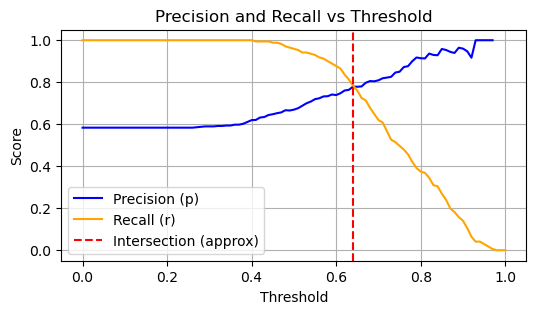

In [40]:
plt.figure(figsize=(6,3))
plt.plot(df_scores['threshold'], df_scores['p'], label='Precision (p)', color='blue')
plt.plot(df_scores['threshold'], df_scores['r'], label='Recall (r)', color='orange')

plt.axvline(x=closest['threshold'], color='red', linestyle='--', label='Intersection (approx)')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
print(np.abs(0.545-0.640))
print(np.abs(0.745-0.640))

0.09499999999999997
0.10499999999999998


### Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.14
- 0.34
- 0.54
- 0.74

**Answer: 0.54**

In [44]:
f1_scores = []

for threshold in np.arange(0.0, 1.01, 0.01):
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= threshold)
    predict_negative = (y_pred < threshold)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    p = tp / (tp + fp)
    r = tp / (tp + fn)
    
    f1 = 2 * ((p*r) / (p+r))
    
    f1_scores.append((threshold, tp, fp, fn, tn, p, r, f1))

C:\Users\diana\AppData\Local\Temp\ipykernel_31532\2963515970.py:16: RuntimeWarning: invalid value encountered in scalar divide
  p = tp / (tp + fp)


In [45]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn', 'p', 'r', 'f1']
df_f1 = pd.DataFrame(f1_scores, columns=columns)

In [46]:
df_f1

,threshold,tp,fp,fn,tn,p,r,f1
0,0.00,171,122,0,0,0.583618,1.000000,0.737069
1,0.01,171,122,0,0,0.583618,1.000000,0.737069
2,0.02,171,122,0,0,0.583618,1.000000,0.737069
3,0.03,171,122,0,0,0.583618,1.000000,0.737069
4,0.04,171,122,0,0,0.583618,1.000000,0.737069
...,...,...,...,...,...,...,...,...
96,0.96,3,0,168,122,1.000000,0.017544,0.034483
97,0.97,1,0,170,122,1.000000,0.005848,0.011628
98,0.98,0,0,171,122,NaN,0.000000,NaN
99,0.99,0,0,171,122,NaN,0.000000,NaN


In [49]:
df_f1['f1'].max()

0.8124999999999999

In [51]:
df_f1['threshold'][df_f1['f1'].idxmax()]

0.5700000000000001

In [53]:
df_f1.iloc[57]

threshold      0.570000
tp           156.000000
fp            57.000000
fn            15.000000
tn            65.000000
p              0.732394
r              0.912281
f1             0.812500
Name: 57, dtype: float64

### Question 5: 5-Fold CV


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard deviation of the scores across different folds?

- 0.0001
- 0.006
- 0.06
- 0.36

**Answer: 0.06**

In [54]:
from sklearn.model_selection import KFold

In [60]:
!pip install tqdm

In [61]:
from tqdm.auto import tqdm

ModuleNotFoundError: No module named 'tqdm'

In [69]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.converted.values
    y_val = df_val.converted.values
    
    train_dicts = df_train[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dicts)
    
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000) 
    model.fit(X_train, y_train)
    
    val_dicts = df_val[categorical + numerical].to_dict(orient='records')
    X_val = dv.transform(val_dicts)
    
    y_pred = model.predict_proba(X_val)[:, 1]

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.822 +- 0.036


### Question 6: Hyperparameter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

* Iterate over the following `C` values: `[0.000001, 0.001, 1]`
* Initialize `KFold` with the same parameters as previously
* Use these parameters for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which `C` leads to the best mean score?

- 0.000001
- 0.001
- 1

**Answer: 0.001**

In [72]:
for C in [0.000001, 0.001, 1]:
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.converted.values
        y_val = df_val.converted.values

        train_dicts = df_train[categorical + numerical].to_dict(orient='records')

        dv = DictVectorizer(sparse=False)
        X_train = dv.fit_transform(train_dicts)

        model = LogisticRegression(solver='liblinear', C=C, max_iter=1000) 
        model.fit(X_train, y_train)

        val_dicts = df_val[categorical + numerical].to_dict(orient='records')
        X_val = dv.transform(val_dicts)

        y_pred = model.predict_proba(X_val)[:, 1]

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s --> %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

C=1e-06 --> 0.560 +- 0.024
C=0.001 --> 0.867 +- 0.029
C=1 --> 0.822 +- 0.036
